# Tutorial 7 - Naive Bayes Classification 
Naive Bayes Classifier calculates the probability of the classes, using Bayes theorem, the conditional probability can be decomposed as:
${\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,}$
${\displaystyle {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}}\,} $ 


## Example

 <img src= "images\knn\naivebayes.jpg" />
 
${ p(yellow)={\frac {7}{17}}\,}$ ${ p(green)={\frac {10}{17}}\,}$


 <img src= "images\knn\naivebayes_2.jpg" />

${ p(?\mid yellow )={\frac {1}{7}}\,}$ ${ p(?\mid green )={\frac {3}{10}}\,}$

Using Bayes theorem: 

${ p(green \mid ? )= p(?\mid green )* p(green) = {\frac {3}{10}} * {\frac {10}{17}}} = \frac {30}{170} $

${ p(yellow \mid ? )= p(?\mid yellow )* p(yellow) = {\frac {1}{10}} * {\frac {7}{17}}} = \frac {7}{170} $

$ p(green \mid ? )  >  p(yellow \mid ? )$ 


The Prediction:  ? is green 


## Naive Bayes 2D
### Preprocessing - Load Haxby Dataset

In [37]:
import os
from nilearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir =  os.path.join('..', 'data')
subject_number = 2 
fetch_stimuli = True
haxby_dataset = datasets.fetch_haxby(data_dir=data_dir, subjects=subject_number, fetch_stimuli=fetch_stimuli )

In [174]:
from nilearn.input_data import NiftiMasker
mask_filename = haxby_dataset.mask_vt[0]
func_file = haxby_dataset.func[0]
masker = NiftiMasker(mask_img=mask_filename, standardize=True, detrend=True)
# Selecting data
X = masker.fit_transform(func_file)
print(X.shape)

(1452, 577)


In [12]:

behavioral = pd.read_csv(haxby_dataset.session_target[0], delimiter=' ')
print(behavioral.labels.unique())

['rest' 'scissors' 'face' 'cat' 'shoe' 'house' 'scrambledpix' 'bottle'
 'chair']


In [176]:
sample_num = 12 
y = behavioral.labels
house_all = X[y == 'house']
face_all = X[y  == 'face']

label = np.concatenate((np.zeros(sample_num,dtype = np.int8),np.ones(sample_num,dtype = np.int8)), axis = 0)
label_str = np.concatenate([['face']*sample_num , ['house']*sample_num], axis = 0)


In [134]:
from matplotlib.colors import ListedColormap

In [137]:
random_voxel =60 #np.random.randint(face_all.shape[0] - sample_num )
face=face_all[random_voxel:random_voxel+12,:]
house=house_all[random_voxel:random_voxel+12,:]
vox_num_1 = 250
vox_num_2 = 300
voxel_1 = np.concatenate((face[:,vox_num_1], house[:,vox_num_1]), axis = 0)
voxel_2 = np.concatenate((face[:,vox_num_2], house[:,vox_num_2]), axis = 0)
color = np.concatenate([['r']*12 , ['g']*12], axis = 0)


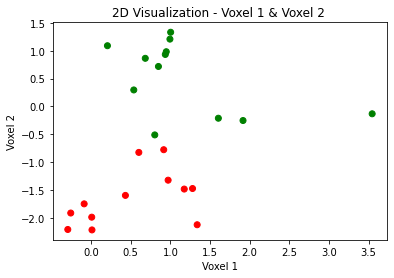

In [179]:

fig, ax = plt.subplots()
scatter = ax.scatter(voxel_1, voxel_2, c=label.tolist() , cmap= ListedColormap(['r','g']))
ax.set_title("2D Visualization - Voxel 1 & Voxel 2 ")
ax.set_xlabel("Voxel 1")
ax.set_ylabel("Voxel 2")
plt.show()

### Naive Bayes model 

In [181]:
data = np.stack([voxel_1 ,voxel_2 ], axis=1)
print(f'train shape: {data.shape}')


train shape: (24, 2)


In [182]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
_ = model.fit(data, label )

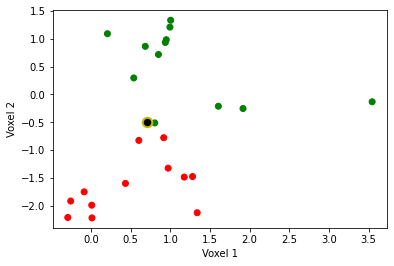

Face Probabilty :0.298
House Probabilty :0.702


In [212]:
x_test = 0.7
y_test = -0.5
predict_proba=model.predict_proba([[x_test,y_test]])[0]


fig, ax = plt.subplots()
scatter = ax.scatter(voxel_1, voxel_2, c=label.tolist() , cmap= ListedColormap(['r','g']))
plt.scatter(x_test, y_test, s=90,linewidths =2, facecolors='k', edgecolors='y')
ax.set_xlabel("Voxel 1")
ax.set_ylabel("Voxel 2")
plt.show()

proba_face = np.round(predict_proba[0],3)
proba_house = np.round(predict_proba[1],3)
print(f'Face Probabilty :{proba_face}')
print(f'House Probabilty :{proba_house}')

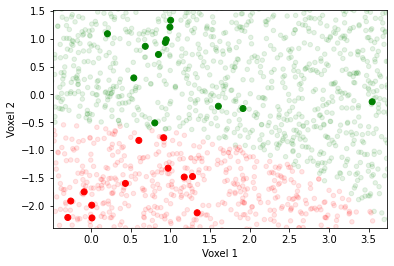

In [235]:
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [8, 8] * rng.rand(5000, 2)
ynew = model.predict(Xnew)
plt.scatter(voxel_1, voxel_2, c=label.tolist() , cmap= ListedColormap(['r','g']))
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap=ListedColormap(['r','g']), alpha=0.1)
plt.axis(lim)
plt.xlabel("Voxel 1")
plt.ylabel("Voxel 2")
plt.show()

In [74]:
model_params=model.get_params()